# What's the truth behind Eurovision?

In this project I will investigate the reasons why the UK scores so poorly in the Eurovision song Contest.
In order to try to improve our ranking we have sent stars like Andrew Lloyd Webber, Bonnie Tyler, Engelbert Humperdink and the boyband Blue. However, this did not help the UK's chances.

So where are we going wrong?

I will investigate:

* The Big 5 rule
* Brexit's effect
* Whether it is the jury or the viewers who dislike the UK

### Import libraries, load dataset & clean data

In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("/Users/melineminassian/Downloads/")
df = pd.read_excel("eurovision_song_contest_1975_2019.xlsx")
df

,Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
0,1975,f,1975f,J,Belgium,Belgium,0,x
1,1975,f,1975f,J,Belgium,Finland,0,NaN
2,1975,f,1975f,J,Belgium,France,2,NaN
3,1975,f,1975f,J,Belgium,Germany,0,NaN
4,1975,f,1975f,J,Belgium,Ireland,12,NaN
...,...,...,...,...,...,...,...,...
49827,2019,f,2019f,J,Belarus,Greece,0,NaN
49828,2019,f,2019f,J,Belarus,Germany,8,NaN
49829,2019,f,2019f,J,Belarus,Belarus,0,x
49830,2019,f,2019f,J,Belarus,The Netherlands,0,NaN


In [3]:
df.shape

(49832, 8)

Only column with missing data is the Duplicate column.
We don't really need this, drop after removing from and to country duplicate rows.

In [4]:
df_m = df.isna().sum()
df_m[df_m > 0]

Duplicate    48304
dtype: int64

Drop all the rows where duplicate = x. This means it is duplicate data.

Check if only have blank duplicates left. We had 48,304 missing values in the duplicates column and we now have 48,304 rows left. Correct!

In [5]:
df = df.drop(df[df.Duplicate == "x"].index)
df.shape

(48304, 8)

In [6]:
del df["Duplicate"]

The points column name has lots of whitespace. Remove the whitesapce and rename the columns so that they make more sense.

In [7]:
eurovision = df.rename(columns = {"(semi-) final": "Final", "Points      ":"Points", "To country": "Country"}) 
eurovision

,Year,Final,Edition,Jury or Televoting,From country,Country,Points
1,1975,f,1975f,J,Belgium,Finland,0
2,1975,f,1975f,J,Belgium,France,2
3,1975,f,1975f,J,Belgium,Germany,0
4,1975,f,1975f,J,Belgium,Ireland,12
5,1975,f,1975f,J,Belgium,Israel,1
...,...,...,...,...,...,...,...
49826,2019,f,2019f,J,Belarus,San Marino,4
49827,2019,f,2019f,J,Belarus,Greece,0
49828,2019,f,2019f,J,Belarus,Germany,8
49830,2019,f,2019f,J,Belarus,The Netherlands,0


We are only interested in the data from the final. Remove all the rows that are not from the final.
* f = final
* sf = semi-final
* sf1 = semi-final 1
* sf2 = semi-final 2

In [8]:
eurovision.Final.unique()

array(['f', 'sf', 'sf1', 'sf2'], dtype=object)

In [9]:
eurovision = eurovision[eurovision.Final == "f"]
eurovision

,Year,Final,Edition,Jury or Televoting,From country,Country,Points
1,1975,f,1975f,J,Belgium,Finland,0
2,1975,f,1975f,J,Belgium,France,2
3,1975,f,1975f,J,Belgium,Germany,0
4,1975,f,1975f,J,Belgium,Ireland,12
5,1975,f,1975f,J,Belgium,Israel,1
...,...,...,...,...,...,...,...
49826,2019,f,2019f,J,Belarus,San Marino,4
49827,2019,f,2019f,J,Belarus,Greece,0
49828,2019,f,2019f,J,Belarus,Germany,8
49830,2019,f,2019f,J,Belarus,The Netherlands,0


In [10]:
eurovision["Jury or Televoting"].unique()

array(['J', 'T'], dtype=object)

# Big Five average scores before and after 2000

In the year 2000 a new rule was implemented where the Big 5 countris (UK, France, Germany, Spain, and later, Italy) qualify automatically, meaning they do not need to participate in the semi-finals. This is because they make the biggest financial contributions to the European Broadcasting Union.

This can be seen as unfair and may be the reason why the UK does not do well.

In [11]:
Big_Five = "United Kingdom", "France", "Germany", "Spain", "Italy"
Big_Four = "United Kingdom", "France", "Germany", "Spain"

In [12]:
big_5 = eurovision.loc[((eurovision["Country"]=="United Kingdom") 
                         | (eurovision["Country"]=="France") 
                         | (eurovision["Country"]=="Germany")
                         | (eurovision["Country"]=="Spain")
                         | (eurovision["Country"]=="Italy"))]

In [13]:
big_5["Country"].unique()

array(['France', 'Germany', 'Italy', 'Spain', 'United Kingdom'],
      dtype=object)

These are the averages scored received by the Big 5 collectively by year since 1975.

In [14]:
eurovision.groupby("Year")["Points"].mean()

Year
1975    3.222222
1976    3.411765
1977    3.411765
1978    3.052632
1979    3.222222
1980    3.222222
1981    3.052632
1982    3.411765
1983    3.052632
1984    3.222222
1985    3.222222
1986    3.052632
1987    2.761905
1988    2.900000
1989    2.761905
1990    2.761905
1991    2.761905
1992    2.636364
1993    2.416667
1994    2.416667
1995    2.636364
1996    2.636364
1997    2.416667
1998    2.416667
1999    2.636364
2000    2.521739
2001    2.636364
2002    2.521739
2003    2.316436
2004    2.485714
2005    2.480263
2006    2.481982
2007    2.475610
2008    2.375238
2009    2.376585
2010    2.381053
2011    2.375238
2012    2.285178
2013    2.289474
2014    2.292735
2015    2.203229
2016    2.285178
2017    2.285178
2018    2.281793
2019    2.241114
Name: Points, dtype: float64

In [15]:
big_5_stats_total = big_5.describe()
del big_5_stats_total["Year"]
big_5_stats_total.round()

,Points
count,6397.0
mean,2.0
std,4.0
min,0.0
25%,0.0
50%,0.0
75%,4.0
max,12.0


In [16]:
big_5_years = big_5.groupby(["Year"])["Points"].agg(["mean", "median", "std", "min", "max"])
big_5_years.round()

,mean,median,std,min,max
Year,,,,,
1975,5.0,4.0,4.0,0,12
1976,5.0,3.0,5.0,0,12
1977,5.0,4.0,4.0,0,12
1978,4.0,3.0,3.0,0,12
1979,5.0,4.0,4.0,0,12
1980,4.0,4.0,4.0,0,12
1981,6.0,6.0,4.0,0,12
1982,6.0,6.0,5.0,0,12
1983,3.0,1.0,3.0,0,12


Let's look at how the Big 5 scored before and after the implementation of the rule in the year 2000.

In [17]:
twentieth = big_5[(big_5["Year"] > 1974) & (big_5["Year"] <= 1999)]
del twentieth["From country"]

In [18]:
twentyfirst = big_5[(big_5["Year"] > 1999)]
del twentyfirst["From country"]

In [19]:
before = twentieth.pivot_table(index= "Country", values="Points", aggfunc=sum)
before["Average"] = before["Points"] / 25
before = before.reset_index()
before

,Country,Points,Average
0,France,1893,75.72
1,Germany,1695,67.80
2,Italy,1292,51.68
3,Spain,1355,54.20
4,United Kingdom,2586,103.44


In [20]:
after = twentyfirst.pivot_table(index="Country", values="Points", aggfunc=sum)
after["Average"] = round(after["Points"] / 19)
after = after.reset_index()
after

,Country,Points,Average
0,France,1369,72.0
1,Germany,1372,72.0
2,Italy,1968,104.0
3,Spain,1023,54.0
4,United Kingdom,870,46.0


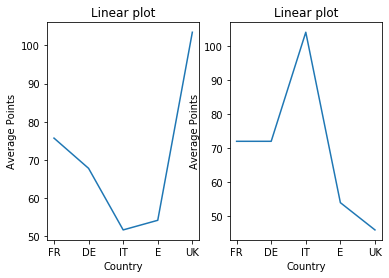

In [21]:
Country = ["FR", "DE", "IT", "E", "UK"]
fig, [ax1,ax2]=plt.subplots(1,2)
ax1.plot(Country,before["Average"],label='linear')
ax1.set_title('Linear plot')
ax1.set_xlabel("Country")
ax1.set_ylabel("Average Points")
ax2.plot(Country,after["Average"],label='lol')
ax2.set_title('Linear plot')
ax2.set_xlabel("Country")
ax2.set_ylabel("Average Points")
plt.show()

Let's create a comparison table so that we can clearly see how the Big 5 countries have been scoring before and after the year 2000.

In [45]:
before_and_after = pd.merge(before, after, "left", on = ["Country"])
before_and_after = before_and_after.rename(columns = {"Average_x": "Average Before","Average_y": "Average After"}) 
before_and_after["Average Diff"] = before_and_after["Average After"] - before_and_after["Average Before"]
before_and_after["Average Var"] = round(((before_and_after["Average Diff"]/before_and_after["Average Before"])*100)).astype(str) + "%"
before_and_after = before_and_after[["Country", "Average Before", "Average After", "Average Diff", "Average Var"]].copy()
before_and_after

,Country,Average Before,Average After,Average Diff,Average Var
0,France,75.72,72.0,-3.72,-5.0%
1,Germany,67.80,72.0,4.20,6.0%
2,Italy,51.68,104.0,52.32,101.0%
3,Spain,54.20,54.0,-0.20,-0.0%
4,United Kingdom,103.44,46.0,-57.44,-56.0%


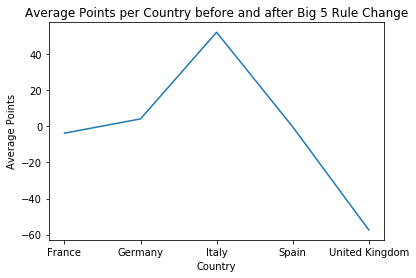

In [23]:
before_and_after["Average Diff"] = before_and_after["Average After"] - before_and_after["Average Before"]
plt.plot(before_and_after["Country"],before_and_after["Average Diff"])
plt.xlabel("Country")
plt.ylabel("Average Points")
plt.title("Average Points per Country before and after Big 5 Rule Change")
plt.show()

We can see that France and the UK's scores have worsened but Germany and Italy's scores have improved whereas Spain's average scores haven't changed.


This means that we can't blame the Big 5 rule as the reason for our poor scores.

## Has Brexit affected the number of votes we received?

Perhaps the rest of Europe resents the fact that the UK voted to leave the United Kingdom.

In [24]:
twentyfirst.reset_index()
brexit = twentyfirst[twentyfirst.Country == "United Kingdom"]
brexit.reset_index()

,index,Year,Final,Edition,Jury or Televoting,Country,Points
0,11393,2000,f,2000f,J,United Kingdom,0
1,11417,2000,f,2000f,J,United Kingdom,0
2,11441,2000,f,2000f,J,United Kingdom,4
3,11465,2000,f,2000f,J,United Kingdom,3
4,11489,2000,f,2000f,J,United Kingdom,0
...,...,...,...,...,...,...,...
884,49704,2019,f,2019f,J,United Kingdom,0
885,49730,2019,f,2019f,J,United Kingdom,0
886,49756,2019,f,2019f,J,United Kingdom,0
887,49782,2019,f,2019f,J,United Kingdom,0


In [25]:
brexit = twentyfirst.pivot_table(index ='Country', columns = "Year", values = "Points", aggfunc=sum, fill_value=0)
brexit

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,
France,5,142,104,19,40,11,5,19,47,107,82,82,21,14,2,4,257,135,173,100
Germany,96,66,17,53,93,4,36,49,14,35,246,107,110,18,39,0,11,6,340,32
Italy,0,0,0,0,0,0,0,0,0,0,0,189,101,126,33,292,124,334,308,461
Spain,18,76,81,81,87,28,18,43,55,23,68,50,97,8,74,15,77,5,61,58
United Kingdom,28,28,111,0,29,18,25,19,14,173,10,100,12,23,40,5,62,111,48,14


In [26]:
pre_brexit = twentyfirst[(twentyfirst["Year"] >= 2000)  & (twentyfirst["Year"] < 2016)]
pre_brexit = pre_brexit.pivot_table(index = "Country", values = "Points", aggfunc = sum)
pre_brexit["Average"] = round(pre_brexit["Points"] / 17)
pre_brexit

,Points,Average
Country,,
France,704,41.0
Germany,983,58.0
Italy,741,44.0
Spain,822,48.0
United Kingdom,635,37.0


In [27]:
post_brexit = twentyfirst[(twentyfirst["Year"] >= 2016)  & (twentyfirst["Year"] < 2019)]
post_brexit = post_brexit.pivot_table(index = "Country", values = "Points", aggfunc = sum)
post_brexit["Average"] = round(post_brexit["Points"] / 4)
post_brexit

,Points,Average
Country,,
France,565,141.0
Germany,357,89.0
Italy,766,192.0
Spain,143,36.0
United Kingdom,221,55.0


Let's create a comparison table so that we can clearly see how the UK's average scores before and after the Brexit vote.

In [28]:
brexiteer = pd.merge(pre_brexit, post_brexit, "left", on = ["Country"])
brexiteer = brexiteer.rename(columns = {"Average_x": "Average Before", "Average_y": "Average After"}) 
brexiteer = brexiteer[["Average Before", "Average After"]].copy()
brexiteer["Average Diff"] = brexiteer["Average After"] - brexiteer["Average Before"]
brexiteer["Average Var"] = round(((brexiteer["Average Diff"]/brexiteer["Average Before"])*100)).astype(str) + "%"
brexiteer = brexiteer[["Average Before", "Average After", "Average Diff", "Average Var"]].copy()
brexiteer = brexiteer.reset_index()
brexiteer

,Country,Average Before,Average After,Average Diff,Average Var
0,France,41.0,141.0,100.0,244.0%
1,Germany,58.0,89.0,31.0,53.0%
2,Italy,44.0,192.0,148.0,336.0%
3,Spain,48.0,36.0,-12.0,-25.0%
4,United Kingdom,37.0,55.0,18.0,49.0%


In [29]:
barchart = pd.merge(pre_brexit, post_brexit, "left", on = ["Country"])
barchart = barchart.rename(columns = {"Points_x": "Points Before","Points_y":"Points After", 
                                      "Average_x": "Average Before", "Average_y": "Average After"}) 
barchart = barchart[["Points Before", "Points After","Average Before", "Average After"]].copy()
barchart = barchart.reset_index()
barchart

,Country,Points Before,Points After,Average Before,Average After
0,France,704,565,41.0,141.0
1,Germany,983,357,58.0,89.0
2,Italy,741,766,44.0,192.0
3,Spain,822,143,48.0,36.0
4,United Kingdom,635,221,37.0,55.0


Our average score since Brexit has actually improved! So it's not because of Brexit that we don't score well.

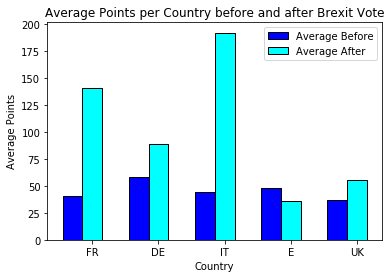

In [30]:
bars1 = barchart["Average Before"]
bars2 = barchart["Average After"]
barWidth = 0.3
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label="Average Before")
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label="Average After")
plt.xticks([r + barWidth for r in range(len(bars1))], ["FR", "DE", "IT", "E", "UK"])
plt.title("Average Points per Country before and after Brexit Vote")
plt.ylabel("Average Points")
plt.xlabel("Country")
plt.legend()
plt.show()


## Is it the jury that doesn't like the UK or the viewers?

The viewers' and the jury's votes have been separated since 2016. Is it the viewers who just don't like the UK or does the jury not like our music?

In [31]:
eurovision["Jury or Televoting"].unique()

array(['J', 'T'], dtype=object)

In [32]:
jury = eurovision[(eurovision["Country"] == "United Kingdom") & (eurovision["Jury or Televoting"] == "J") 
                  & (eurovision["Year"] >= 2016)]
jury = jury.pivot_table(index = "Year", values = "Points", aggfunc = np.mean)
jury["Points"] = round(jury["Points"], 2)
jury = jury.reset_index()
jury

,Year,Points
0,2016,1.32
1,2017,2.41
2,2018,0.55
3,2019,0.28


In [43]:
viewer = eurovision[(eurovision["Country"] == "United Kingdom") & (eurovision["Jury or Televoting"] == "T")
                    & (eurovision["Year"] >= 2016)]
viewer = viewer.pivot_table(index = "Year", values = "Points", aggfunc = np.mean)
viewer["Points"] = round(viewer["Points"], 2)
viewer = viewer.reset_index()
viewer

,Year,Points
0,2016,0.20
1,2017,0.29
2,2018,0.60
3,2019,0.08


Let's create a comparison table so that we can clearly see the UK's average scores from the jury and from the viewers.

In [44]:
jury_or_viewer = pd.merge(jury, viewer, "left", on = ["Year"])
jury_or_viewer = jury_or_viewer.rename(columns = {"Points_x": "Average Jury","Points_y": "Average Viewer"}) 
jury_or_viewer["Average Diff"] = jury_or_viewer["Average Viewer"] - jury_or_viewer["Average Jury"]
jury_or_viewer["Average Var"] = round(((jury_or_viewer["Average Diff"]
                                        /jury_or_viewer["Average Viewer"])*100)).astype(str) + "%"
jury_or_viewer

,Year,Average Jury,Average Viewer,Average Diff,Average Var
0,2016,1.32,0.20,-1.12,-560.0%
1,2017,2.41,0.29,-2.12,-731.0%
2,2018,0.55,0.60,0.05,8.0%
3,2019,0.28,0.08,-0.20,-250.0%


Average votes from the viewers is lower than the average votes from the jury. But the difference isn't much.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Average Points per Year Jury vs Viewer')

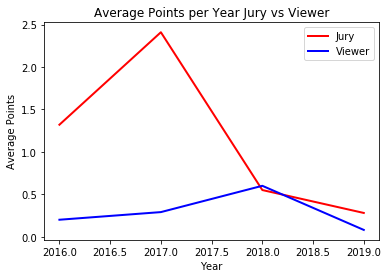

In [35]:
df=pd.DataFrame({'x': jury["Year"], 'y1': jury["Points"], 'y2': viewer["Points"]})
plt.plot( 'x', 'y1', data=df, marker='', color='red', linewidth=2, label = "Jury")
plt.plot( 'x', 'y2', data=df, marker='', color='blue', linewidth=2, label = "Viewer")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Points")
plt.title("Average Points per Year Jury vs Viewer")

# Conclusion

It seems that the UK's scores have not been affected negatively by the Brexit vote or the Big 5 rule. The viewer gives fewer points to the UK than the jury does but the difference is not enough for us to put this down as the reason the UK does not score well.

Perhaps the songs that the UK perform at the Eurovision Song Contest are not considered good enough by the participating countries and we simply need to put more effort into finding a good song and putting together a great performance.

### BONUS
##### For fun, let's look at the difference in votes between the jury and the viewer by country.

In [36]:
juror = eurovision[(eurovision["Jury or Televoting"] == "J") & (eurovision["Year"] >= 2016)]
juror = juror.pivot_table(index = "Country", values = "Points", aggfunc = np.mean)
juror = juror.reindex(juror["Points"].sort_values(ascending=False).index)
juror["Points"] = round(juror["Points"], 2)
juror = juror.reset_index()
juror.index = juror.index + 1
juror

,Country,Points
1,North Macedonia,5.88
2,Sweden,5.07
3,Portugal,4.86
4,Australia,4.48
5,Bulgaria,4.07
6,Switzerland,3.65
7,The Netherlands,3.44
8,Austria,3.19
9,Russia,3.09
10,Italy,2.96


In [51]:
viewer = eurovision[(eurovision["Jury or Televoting"] == "T") & (eurovision["Year"] >= 2016)]
viewer = viewer.pivot_table(index = "Country", values = "Points", aggfunc = np.mean)
viewer = viewer.reindex(viewer["Points"].sort_values(ascending=False).index)
viewer["Points"] = round(viewer["Points"], 2)
viewer = viewer.reset_index()
viewer.index = viewer.index + 1
viewer.head()

,Country,Points
1,Russia,7.21
2,Romania,5.46
3,Switzerland,5.25
4,Portugal,4.75
5,Bulgaria,4.70


In [54]:
both = pd.merge(juror, viewer, "left", on = ["Country"])
both = both.rename(columns = {"Points_x": "Jury","Points_y":"Viewer"}) 
both["Difference"] = both["Jury"] - both["Viewer"]
both = both.reindex(both["Difference"].sort_values(ascending=False).index)
both = both.reset_index()
both.index = both.index + 1
del both["index"], both["Jury"], both["Viewer"]
both

,Country,Difference
1,North Macedonia,4.46
2,Sweden,2.77
3,Australia,2.47
4,Malta,2.13
5,Austria,1.65
6,Georgia,1.36
7,The Netherlands,1.33
8,Azerbaijan,0.90
9,United Kingdom,0.85
10,Albania,0.78


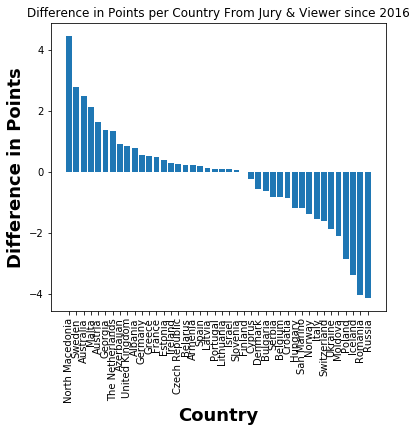

In [55]:
height = both["Difference"]
bars = both["Country"]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
figsize=(50,250)
plt.xticks(y_pos, bars, rotation = 90)
plt.subplots_adjust(bottom=19, top=20)
y_pos = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,
         58,60,62,64,66,68,70,72,74,76,78,80,82,84]
plt.xlabel("Country", fontweight='bold', color = 'black', fontsize='18')
plt.ylabel("Difference in Points", fontweight='bold', color = 'black', fontsize='18',rotation='vertical')
plt.title("Difference in Points per Country From Jury & Viewer since 2016")
plt.show()

Top 3 countries where the jury awards more points to the UK than the viewers:

* North Macedonia
* Sweden
* Australia

Top 3 countries where the viewer awards more points to the UK than the jury:

* Russia
* Romania
* Iceland